# BIG DATA MART SALES PROBLEM

Submitted by:Sucharitha A M
             1829 batch

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_recall_curve,roc_curve
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import cross_val_score
import joblib
import warnings
warnings.filterwarnings('ignore')

# Examining the Data

In [2]:
df = pd.read_csv('bigdatatrain.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


This method print the information about the DataFrame including the index type and column type,non-null values and memory usage.

In [4]:
df.shape

(5681, 11)

Dataset contains 5681 rows and 11 cloumns.

In [5]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
dtype: object

In [6]:
df['Outlet_Type'].unique()

array(['Supermarket Type1', 'Grocery Store', 'Supermarket Type3',
       'Supermarket Type2'], dtype=object)

Target/dependent variables is discrete and categorial in nature


In [7]:
df.loc[df['Outlet_Type']==" "]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type


In [8]:
df["Outlet_Type"]=df["Outlet_Type"].replace(" ",np.nan)

In [9]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

Here item_weight and oulet_size will be have sum and remaining will be zero

In [10]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
dtype: object

# Making DataFrame for the Nominal Data

In [11]:
df_visualization_nominal=df[["Item_Identifier","Item_Weight","Item_Fat_Content","Item_Type","Item_MRP","Outlet_Identifier","Outlet_Establishment_Year","Outlet_Size","Outlet_Location_Type"]].copy()

In [12]:
df_visualization_nominal.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Type',
       'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year',
       'Outlet_Size', 'Outlet_Location_Type'],
      dtype='object')

Dataset contains visualization of nominal 9 columns

# Visualization of the Data

FDZ50    8
FDW10    8
FDN52    8
NCS41    8
FDK57    8
        ..
FDG09    1
FDP28    1
FDU12    1
FDL20    1
FDR59    1
Name: Item_Identifier, Length: 1543, dtype: int64


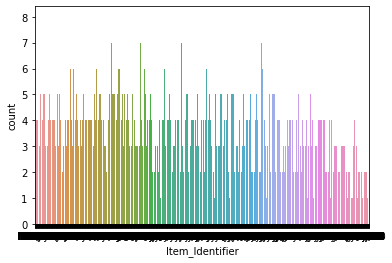

In [13]:
ax = sns.countplot(x="Item_Identifier",data=df_visualization_nominal)
print(df_visualization_nominal["Item_Identifier"].value_counts())

Here countplot contains the data visualization of nominal columns of item_identifier

10.50    57
17.60    53
15.60    48
20.25    47
19.35    46
         ..
7.67      1
6.32      1
8.06      1
6.96      1
5.15      1
Name: Item_Weight, Length: 410, dtype: int64


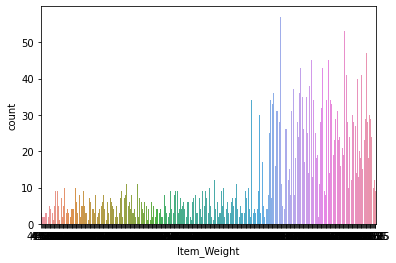

In [14]:
ax = sns.countplot(x="Item_Weight",data=df_visualization_nominal)
print(df_visualization_nominal["Item_Weight"].value_counts())

Here countplot contains the data visualization of nominal columns of item_weight

Low Fat    3396
Regular    1935
LF          206
reg          78
low fat      66
Name: Item_Fat_Content, dtype: int64


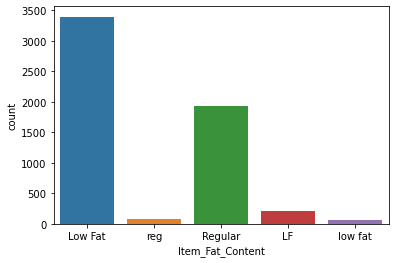

In [15]:
ax = sns.countplot(x="Item_Fat_Content",data=df_visualization_nominal)
print(df_visualization_nominal["Item_Fat_Content"].value_counts())

Here countplot contains the data visualization of nominal columns of item_fat_content contains low fat 3396 and regular 1935

Snack Foods              789
Fruits and Vegetables    781
Household                638
Frozen Foods             570
Dairy                    454
Baking Goods             438
Canned                   435
Health and Hygiene       338
Meat                     311
Soft Drinks              281
Breads                   165
Hard Drinks              148
Starchy Foods            121
Others                   111
Breakfast                 76
Seafood                   25
Name: Item_Type, dtype: int64


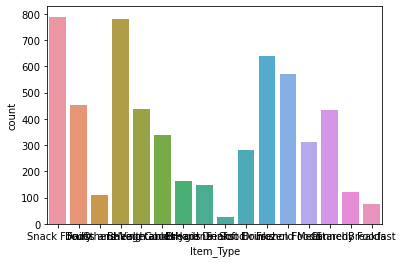

In [16]:
ax = sns.countplot(x="Item_Type",data=df_visualization_nominal)
print(df_visualization_nominal["Item_Type"].value_counts())

Here countplot contains the data visualization of nominal columns of item_type

57.0614     5
173.6422    4
59.2562     4
175.0370    4
189.6214    4
           ..
88.4856     1
227.0694    1
88.2540     1
161.4920    1
112.1228    1
Name: Item_MRP, Length: 4402, dtype: int64


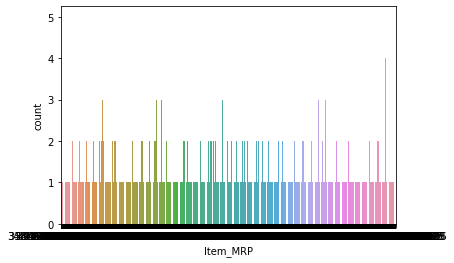

In [17]:
ax = sns.countplot(x="Item_MRP",data=df_visualization_nominal)
print(df_visualization_nominal["Item_MRP"].value_counts())

Here countplot contains the data visualization of nominal columns of item_mrp

OUT027    624
OUT013    621
OUT035    620
OUT046    620
OUT049    620
OUT045    619
OUT018    618
OUT017    617
OUT010    370
OUT019    352
Name: Outlet_Identifier, dtype: int64


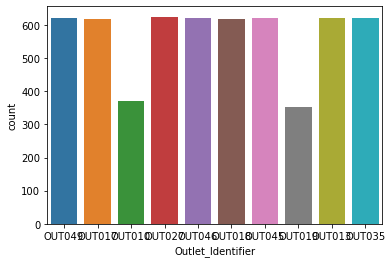

In [18]:
ax = sns.countplot(x="Outlet_Identifier",data=df_visualization_nominal)
print(df_visualization_nominal["Outlet_Identifier"].value_counts())

Here countplot contains the data visualization of nominal columns of outlet_identifier

1985    976
1987    621
1999    620
1997    620
2004    620
2002    619
2009    618
2007    617
1998    370
Name: Outlet_Establishment_Year, dtype: int64


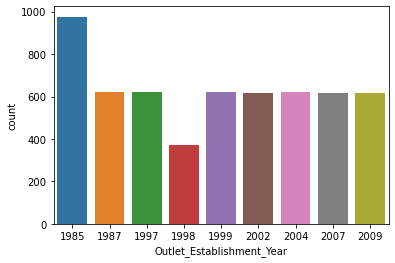

In [19]:
ax = sns.countplot(x="Outlet_Establishment_Year",data=df_visualization_nominal)
print(df_visualization_nominal["Outlet_Establishment_Year"].value_counts())

Here countplot contains the data visualization of nominal columns of outlet_establish_year

Medium    1862
Small     1592
High       621
Name: Outlet_Size, dtype: int64


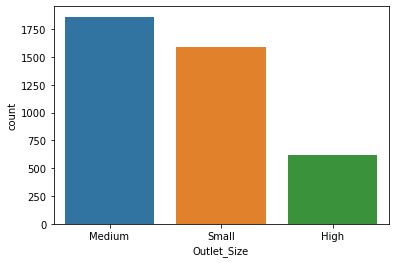

In [20]:
ax = sns.countplot(x="Outlet_Size",data=df_visualization_nominal)
print(df_visualization_nominal["Outlet_Size"].value_counts())

Here countplot contains the data visualization of nominal columns of outlet_size

Tier 3    2233
Tier 2    1856
Tier 1    1592
Name: Outlet_Location_Type, dtype: int64


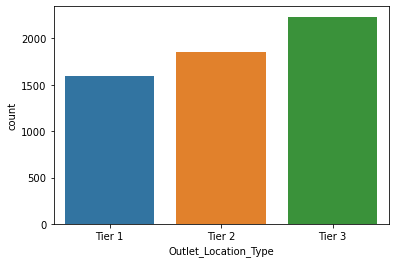

In [21]:
ax = sns.countplot(x="Outlet_Location_Type",data=df_visualization_nominal)
print(df_visualization_nominal["Outlet_Location_Type"].value_counts())

# Making dataframe of the ordinal data

In [22]:
df_visualization_ordinal=df[["Item_Identifier","Item_MRP"]].copy()

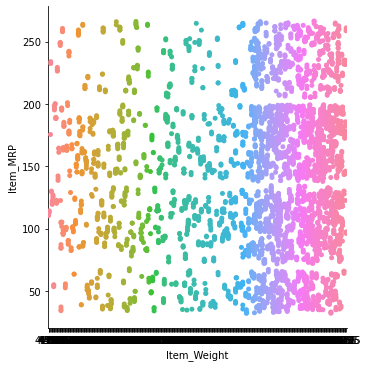

In [23]:
sns.catplot(x="Item_Weight",y="Item_MRP",data=df)

Here catplot contains the data visualization of ordinal data of item_identifier and item_mrp,here x=item_weight and y=item_mrp

# checking the distribution of the continuous value of the object type columns

In [24]:
df_visualization_continuous=df[["Outlet_Location_Type","Outlet_Type"]].copy()

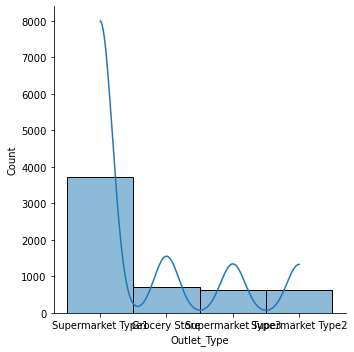

In [25]:
sns.displot(df_visualization_continuous['Outlet_Type'], kde=True)

Data is not normally distributed in this columns,because of viscous problem.

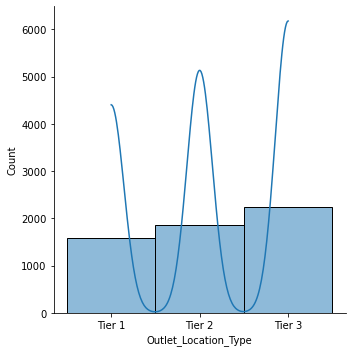

In [26]:
sns.displot(df_visualization_continuous['Outlet_Location_Type'], kde=True)

Data is not normally distributed in this columns beacause of viscous problem.

# Encoding of DataFrame

In [27]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder

In [28]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


Dataset contains 5681 rows and 11 columns

# Importing the Dataset

In [29]:
df = pd.read_csv('bigdatamart.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


# checking Null values in the dataframe

In [30]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Here item_weight and outlet_size contains sum values and remaining values will be zero

# Describe the dataset

In [31]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


<AxesSubplot:>

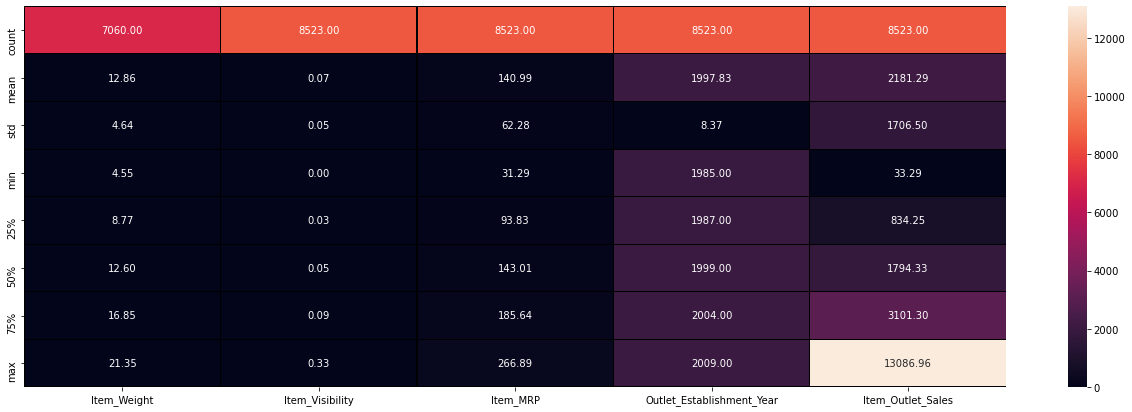

In [32]:
plt.figure(figsize=(22,7))
sns.heatmap(df.describe(),annot=True,linewidths=0.1,linecolor='black',fmt="0.2f")

Here heatmap containes the difference of describe values of dataset.

Light shades are higly describe

# Correlation of the columns with the target columns

In [33]:
df.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


<AxesSubplot:>

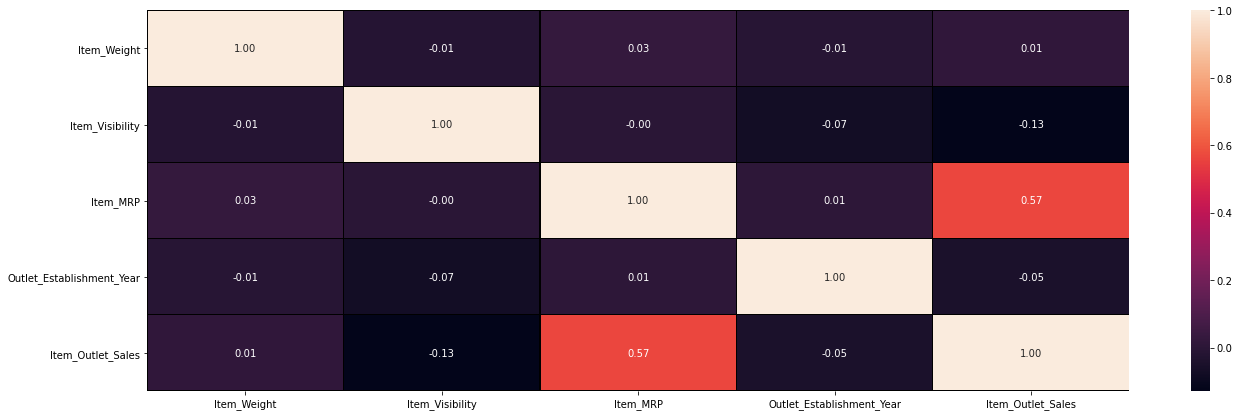

In [34]:
plt.figure(figsize=(22,7))
sns.heatmap(df.corr(),annot=True,linewidths=0.1,linecolor='black',fmt="0.2f")

Here heatmap containes the difference of corresponding values of dataset.

Light shades are higly corrolated

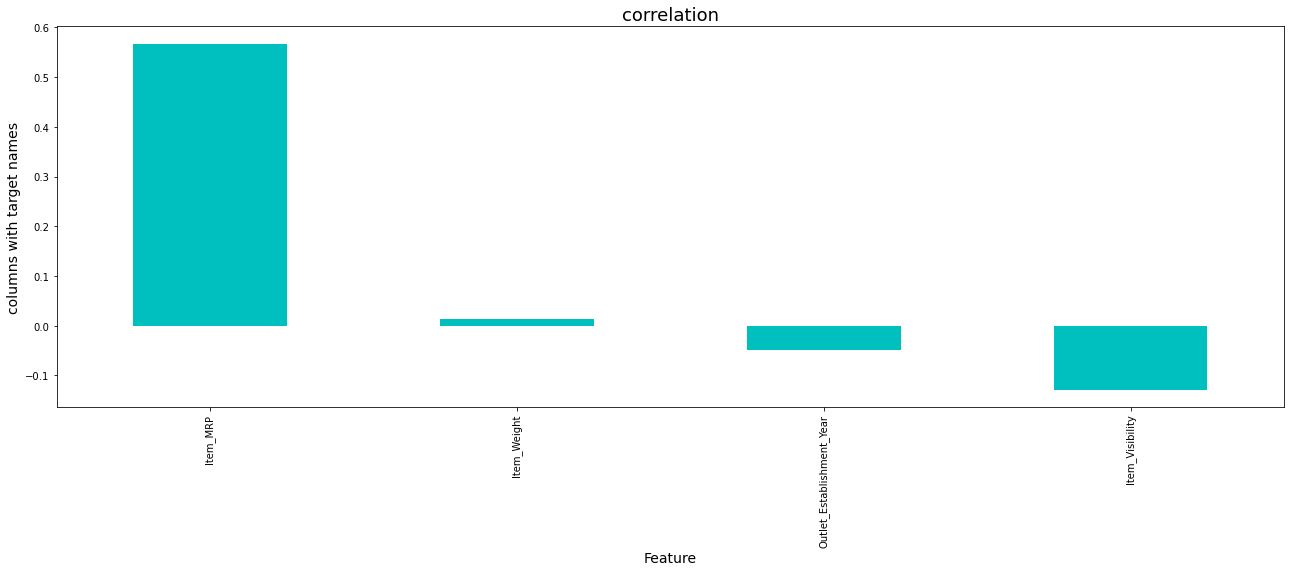

In [35]:
plt.figure(figsize=(22,7))
df.corr()['Item_Outlet_Sales'].sort_values(ascending=False).drop(['Item_Outlet_Sales']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('columns with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

Here the different corresponding plots of the target variable item_outlet_sales,here x label will be features and y label are target names.

In [36]:
df.skew()

Item_Weight                  0.082426
Item_Visibility              1.167091
Item_MRP                     0.127202
Outlet_Establishment_Year   -0.396641
Item_Outlet_Sales            1.177531
dtype: float64

Dataset skewness values

# outliers check

In [37]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

<AxesSubplot:>

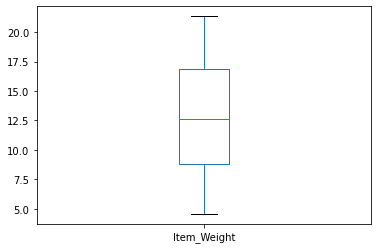

In [38]:
df['Item_Weight'].plot.box()

Here all boxplots have no outside the viscous so we cant find here outliers easily.

<AxesSubplot:>

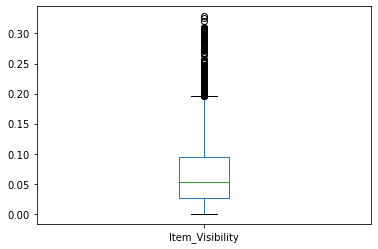

In [39]:
df['Item_Visibility'].plot.box()

Here all boxplots have outside the viscous so we can find here outliers easily.

<AxesSubplot:>

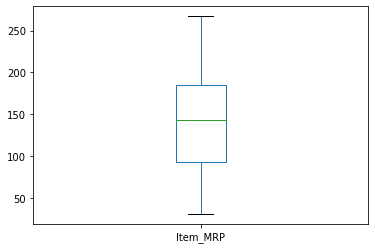

In [40]:
df['Item_MRP'].plot.box()

Here all boxplots have no outside the viscous so we cant find here outliers easily.

<AxesSubplot:>

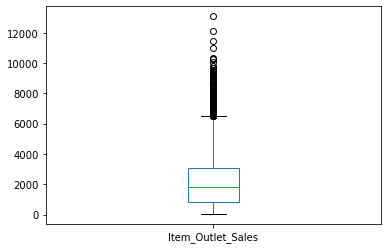

In [41]:
df['Item_Outlet_Sales'].plot.box()

Here all boxplots have outside the viscous so we can find here outliers easily.

In [42]:
df.shape

(8523, 12)

Dataset contains 8523 rows and 12 columns

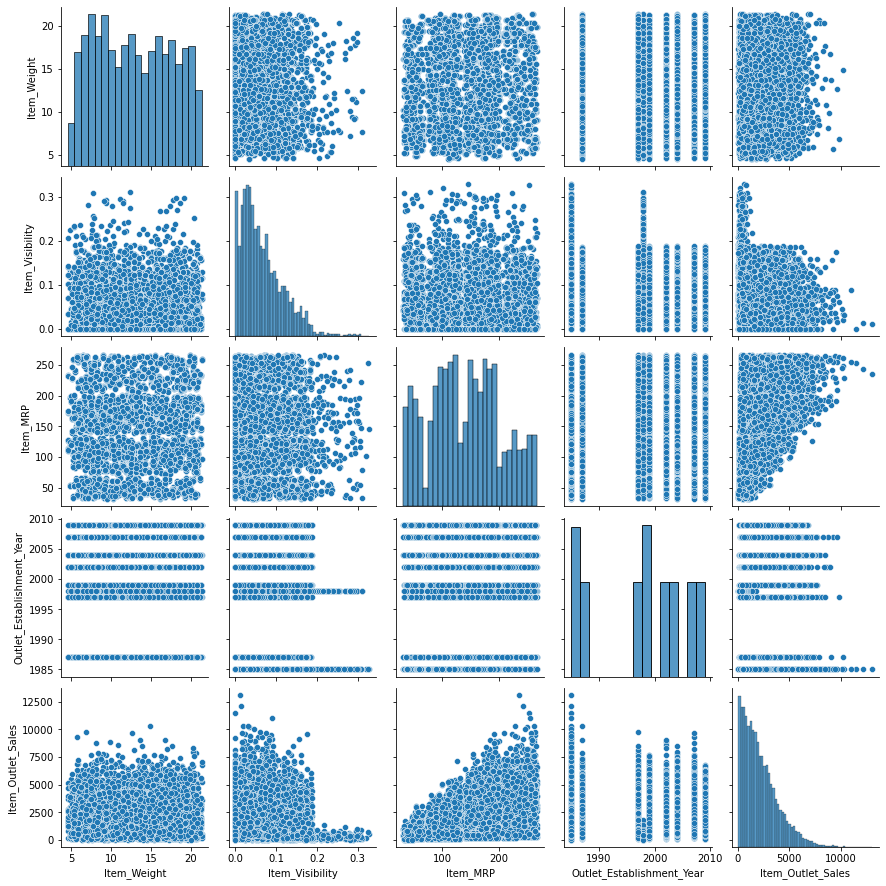

In [43]:
sns.pairplot(df)

Remove the missing values.

drop  the nagativitycorrelated columns.

remove the outliers.

# considering the outlier removal

In [44]:
df.drop('Item_Weight',axis=1,inplace=True)
df.head()

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [45]:
df.shape

(8523, 11)

Dataset contains 8523 rows and 11 columns

In [46]:
df.columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
       'Item_Outlet_Sales'],
      dtype='object')

Dataset contains 11 columns

In [47]:
df.columns = df.columns.str.strip()

In [48]:
df.drop('Item_Identifier',axis=1,inplace=True)
# df.iloc[:,0].drop(axis=1)

In [50]:
df.head()

,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [51]:
df.isnull().sum()

Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Here outlet_size only it contains sum remaining will be zero.

In [52]:
df.apply(lambda x: len(x.unique()))

Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     4
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

Here we can apply lambda x that dataset contains the unique values.

In [53]:
df['Outlet_Establishment_Year'].value_counts()

1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

# Different Visualization of varience

In [54]:
df = pd.get_dummies(df)
dummy_df = df.copy()

<AxesSubplot:>

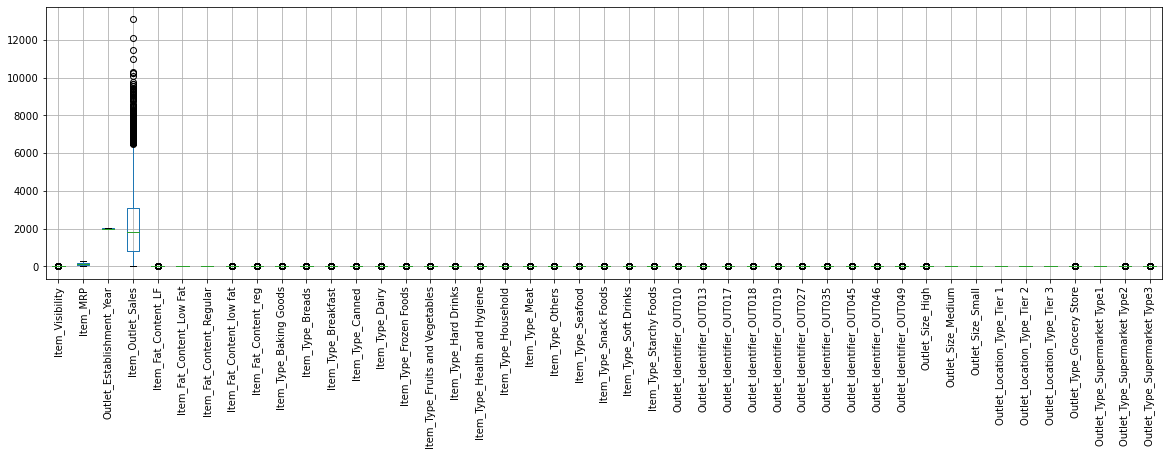

In [55]:
df.boxplot( rot = 90, figsize=(20,5))

Here all values of box plots

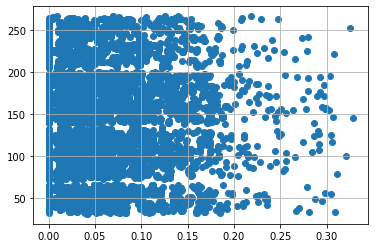

In [56]:
var = 'Item_Visibility'
plt.scatter(x = df[var],y = df['Item_MRP'],)
plt.grid(True)

Here different varience of item_visibility and item_mrp.

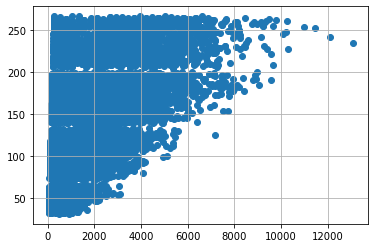

In [57]:
var = 'Item_Outlet_Sales'
plt.scatter(x = df[var],y = df['Item_MRP'])
plt.grid(True)

Here different varience of item_outlet_sales and item_mrp.

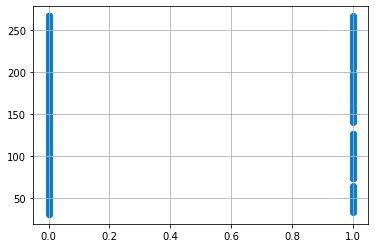

In [58]:
var = 'Item_Type_Dairy'
plt.scatter(x = df[var],y = df['Item_MRP'])
plt.grid(True)

Here different varience of item_type_dairy and item_mrp.

# Model Building

In [59]:
x_train = df.drop(['Item_MRP'],axis=1)
y_train = df.Item_MRP


In [60]:
x_train.head()

,Item_Visibility,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,Item_Type_Baking Goods,Item_Type_Breads,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,0.016047,1999,3735.1380,0,1,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,0.019278,2009,443.4228,0,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
2,0.016760,1999,2097.2700,0,1,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3,0.000000,1998,732.3800,0,0,1,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
4,0.000000,1987,994.7052,0,1,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0


Here x_train contains 5 rows and 44 columns

In [61]:
y_train.head()

0    249.8092
1     48.2692
2    141.6180
3    182.0950
4     53.8614
Name: Item_MRP, dtype: float64

Here y_train contains item_mrp 

In [62]:
x_train.shape

(8523, 44)

Here x_train contains 8523 rows and 44 columns

In [63]:
y_train.shape

(8523,)

Here y_train contains 8523 rows only there is no columns

# Regression Methods

In [64]:
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score

In [65]:
x = df.drop(['Item_MRP'],axis=1)
y = df["Item_MRP"]
x_train, x_test, y_train, y_test=train_test_split(x, y, random_state=0, test_size=0.2)

In [66]:
from sklearn.metrics import mean_squared_error
for i in range(200):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=i)
    from sklearn.tree import DecisionTreeRegressor
    lm=DecisionTreeRegressor()
    lm.fit(x_train,y_train)
    y_pred=lm.predict(x_test)
    mse=mean_squared_error(y_test,y_pred)
    rmse = np.sqrt(mse)
    print(rmse)

61.144503051290776
62.17095997846466
61.64033480312783
61.02695840100477
60.3284969028684
61.76716158958876
62.67717545998197
61.48112895894959
61.434349396070004
61.473681444402395
61.76876661683503
62.32865751431526
59.688268174507726
60.585920081036235
60.98848405336962
60.27890497997866
61.98608193485979
62.82610595063385
61.19895024737589
61.82084858290148
62.590487457167974
60.91716533210158
62.733366827445224
62.19566724929535
61.77061061479693
61.33078418137081
60.65350673327399
61.63113619142531
61.727573897283825
60.969895103773645
62.49851712880744
61.880670314619294
62.75060568980576
61.8853851244981
59.92263185404807
58.7306625040553
63.37213825975189
62.330653669310465
61.414554858215745
61.797585648570504
60.63509964510187
61.59865668025217
61.33440748772353
61.23542433025504
61.139883050957295
62.325106568580466
62.23724758298358
61.91112100260011
62.335863663910565
62.109049280827406
59.75542373297258
59.60553944656168
61.0476726246981
62.06449917561878
60.464962372945

In [67]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(x_train,y_train)
y_pred_regressor = regressor.predict(x_test)

In [68]:
y_pred = regressor.predict(x_test)

In [69]:
y_pred

array([162.8894, 122.5388, 194.5794, ..., 114.7176, 140.2496,  64.7168])

In [70]:
dt_accuracy = round(regressor.score(x_train,y_train)*100,2)
dt_accuracy

100.0

The Test accuracy of decision regressor is 100

In [71]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [72]:
y_pred = regressor.predict(x_test)

In [73]:
y_pred

array([112.59920555,  88.5403579 , 187.78435076, ..., 128.74570816,
       119.22538991, 115.51971456])

In [74]:
lr_accuracy = round(regressor.score(x_train,y_train)*100,2)
lr_accuracy

43.13

The Test accuracy of logistic regressor is 43.13

In [75]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()
regressor.fit(x_train,y_train)

RandomForestRegressor()

In [76]:
y_pred = regressor.predict(x_test)
y_pred

array([ 98.238396,  66.236788, 181.54998 , ..., 150.445372, 127.626548,
       131.621634])

In [77]:
rf_accuracy = round(regressor.score(x_train,y_train)*100,2)
rf_accuracy

92.51

The Test accuracy of randomforestregressor is 92.53

# Cross validation methods

In [78]:
from sklearn.model_selection import cross_val_score

In [79]:
print(cross_val_score(regressor,x,y,cv=5).mean())

0.4760972378607402


# Hyperparameter Tunnings

In [80]:
from sklearn.model_selection import GridSearchCV

In [81]:
parameter = {"max_depth":[1,3,5,7,9,11,12],
             'criterion':['mse','friedman_mse']}

In [82]:
GCV = GridSearchCV(DecisionTreeRegressor(),parameter,cv=5)

In [83]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['mse', 'friedman_mse'],
                         'max_depth': [1, 3, 5, 7, 9, 11, 12]})

In [84]:
GCV.best_params_

{'criterion': 'mse', 'max_depth': 5}

# Final Model

In [85]:
Final_mod = DecisionTreeRegressor()
Final_mod.fit(x_train,y_train)
pred = Final_mod.predict(x_test)
print((regressor.score(x_test,y_test)*100))

47.75070578249093


# Saving the model

In [86]:
import joblib
joblib.dump(Final_mod,"FinalModle.pkl")

['FinalModle.pkl']

# prediction Method

In [87]:
preds = regressor.predict(x_test)
print(preds[:36])
print(y_test[:36].values)

[ 98.238396  66.236788 181.54998  136.184554  61.823114 119.223222
 217.04699  162.257092 244.657612 174.505024  70.547276  81.224332
  92.39617  169.046676 197.33054  191.659162 204.221076 198.946828
 132.691122 222.075422 164.31012  168.178742 111.985132 104.28273
 156.478676 118.960586 190.059796 144.676604  62.633252  93.454494
 118.35482   95.636274 155.703676 104.658366 205.898486  89.645204]
[ 59.2562 107.6596 239.8222 238.3538  60.9562  76.667  211.556  143.8128
 255.7988 169.5474  98.6726  49.8034 150.205  155.8946 188.1872 178.3344
 231.601  180.6292 159.7894 218.4482 245.7802 153.3656  92.2488  55.993
  95.9726  43.377  213.4218 170.2448 146.6734 114.8492  94.4094  56.893
 172.2448 122.4072 181.8608  58.4904]


The train and test data is balanced most regressor methods hit the 48% accuracy with the datset.